In [0]:
#!unzip air-pollution-in-seoul.zip

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [4]:
# Retriving data for station code 106 for SO2
data_107=data[(data['Station code']==107) & (data['SO2']>0)]
print(len(data_107))
print(data_107.head(10))

25777
        Measurement date  Station code  ...  PM10  PM2.5
155405  2017-01-01 00:00           107  ...  64.0   40.0
155406  2017-01-01 01:00           107  ...  54.0   53.0
155407  2017-01-01 02:00           107  ...  65.0   48.0
155408  2017-01-01 03:00           107  ...  72.0   49.0
155409  2017-01-01 04:00           107  ...  67.0   38.0
155410  2017-01-01 05:00           107  ...  61.0   38.0
155411  2017-01-01 06:00           107  ...  60.0   36.0
155412  2017-01-01 07:00           107  ...  56.0   36.0
155413  2017-01-01 08:00           107  ...  58.0   35.0
155414  2017-01-01 09:00           107  ...  71.0   29.0

[10 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


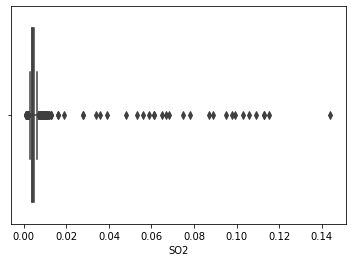

In [5]:
import seaborn as sns
sns.boxplot(data_107['SO2'])

25743


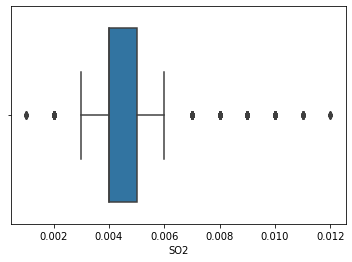

In [6]:
from scipy import stats
z = np.abs(stats.zscore(data_107['SO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_107_Rout = data_107[(z < 3)]
print(len(data_107_Rout))
sns.boxplot(data_107_Rout['SO2'])

In [7]:
df=data_107_Rout['SO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25743, 1)


In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.012]
25743
0.0 1.0000000000000002


In [9]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25738 [0.36363636363636365, 0.27272727272727276, 0.27272727272727276, 0.27272727272727276, 0.27272727272727276]


In [10]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25738, 5)


,x1,x2,x3,x4,y
0,0.363636,0.272727,0.272727,0.272727,0.272727
1,0.272727,0.272727,0.272727,0.272727,0.272727
2,0.272727,0.272727,0.272727,0.272727,0.272727
3,0.272727,0.272727,0.272727,0.272727,0.272727
4,0.272727,0.272727,0.272727,0.272727,0.363636
5,0.272727,0.272727,0.272727,0.363636,0.272727
6,0.272727,0.272727,0.363636,0.272727,0.363636
7,0.272727,0.363636,0.272727,0.363636,0.363636
8,0.363636,0.272727,0.363636,0.363636,0.363636
9,0.272727,0.363636,0.363636,0.363636,0.363636


In [11]:
print(matrix[:,4])

[[0.27272727]
 [0.27272727]
 [0.27272727]
 ...
 [0.18181818]
 [0.18181818]
 [0.18181818]]


In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8494, 1) [[0.36340309]
 [0.17642667]
 [0.2757306 ]
 [0.2059441 ]
 [0.21029863]]


In [13]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.7374908186621092
[0.02862674]
[[0.0583499  0.08004601 0.1862958  0.58135579]]


In [14]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.00343832084266236
absolute mean error :  0.042615742317417625
0.7178646744027695


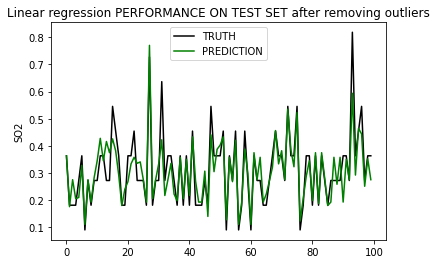

In [15]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('SO2')
plt.legend()
plt.show()

(25777, 1)
[0.001] [0.144]
25777
0.0 1.0
25772 [0.02797202797202797, 0.02097902097902098, 0.02097902097902098, 0.02097902097902098, 0.02097902097902098]
(8505, 1) [[0.02196021]
 [0.02916643]
 [0.02523899]
 [0.02222323]
 [0.01722912]]
mean squared eror :  0.00036672244626102606
absolute mean error :  0.0054663053511112515
0.1033014528911167


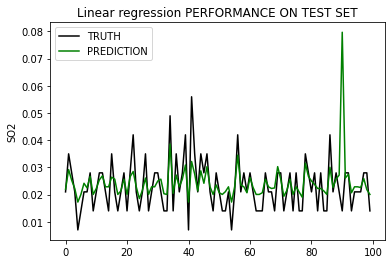

In [16]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_107['SO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [17]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.00036676276341101623
absolute mean error :  0.005469861559610831
0.10320287062491407


In [18]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.00034845530464938494
absolute mean error :  0.004015344147071536
0.14796771073815274


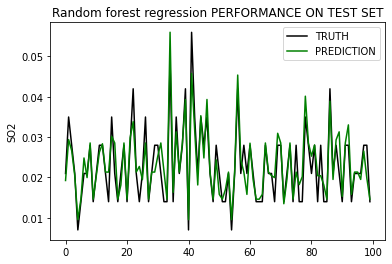

truth :  [[0.02097902]
 [0.03496503]
 [0.02797203]
 [0.02097902]
 [0.00699301]
 [0.01398601]
 [0.02097902]
 [0.02097902]
 [0.02797203]
 [0.01398601]]
prediction :  [0.01923453 0.02936922 0.02663125 0.0204251  0.00953168 0.01460799
 0.02481847 0.01995237 0.02853919 0.01460799]


In [19]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [20]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.00036848996600326984
0.0056059008222322515
0.098979567495184


In [21]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.00047956859549156897
absolute mean error :  0.0036763080258608058
-0.17262651141417074


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


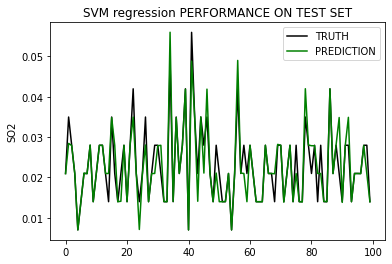

In [22]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [23]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Using TensorFlow backend.


Epoch 1/100
17267/17267 [==============================] - 3s 182us/step - loss: 3.6531e-04 - accuracy: 2.3166e-04
Epoch 2/100
17267/17267 [==============================] - 1s 84us/step - loss: 3.5011e-04 - accuracy: 2.3166e-04
Epoch 3/100
17267/17267 [==============================] - 1s 85us/step - loss: 3.4492e-04 - accuracy: 2.3166e-04
Epoch 4/100
17267/17267 [==============================] - 1s 84us/step - loss: 3.4608e-04 - accuracy: 2.3166e-04
Epoch 5/100
17267/17267 [==============================] - 1s 84us/step - loss: 3.4388e-04 - accuracy: 2.3166e-04
Epoch 6/100
17267/17267 [==============================] - 1s 83us/step - loss: 3.4218e-04 - accuracy: 2.3166e-04
Epoch 7/100
17267/17267 [==============================] - 1s 87us/step - loss: 3.3824e-04 - accuracy: 2.3166e-04
Epoch 8/100
17267/17267 [==============================] - 1s 85us/step - loss: 3.4183e-04 - accuracy: 2.3166e-04
Epoch 9/100
17267/17267 [==============================] - 1s 86us/step - loss: 3.3982e

dict_keys(['loss', 'accuracy'])


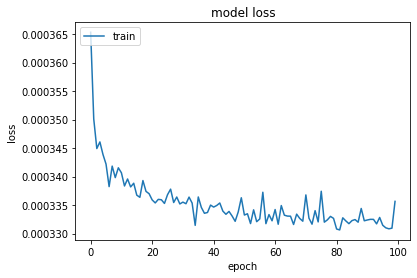

mean squared error :  0.0003240939709307963
mean absolute error :  0.0036763080258608058
-0.17262651141417074


In [24]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


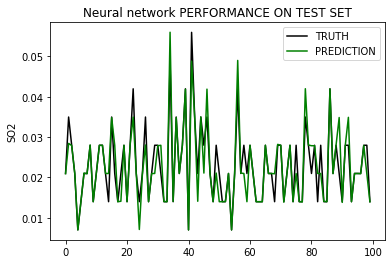

In [25]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [26]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.01398601 0.01398601 0.02097902 0.02097902]
 [0.04195804 0.04195804 0.02797203 0.03496503]
 [0.02797203 0.02797203 0.02797203 0.02097902]
 ...
 [0.02097902 0.01398601 0.02097902 0.02097902]
 [0.02797203 0.02097902 0.02797203 0.02797203]
 [0.01398601 0.01398601 0.01398601 0.01398601]]
(17267, 4)
(17267, 4, 1)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17267/17267 [==============================] - 18s 1ms/step - loss: 3.9876e-04
Epoch 2/100
17267/17267 [==============================] - 17s 971us/step - loss: 3.7720e-04
Epoch 3/100
17267/17267 [==============================] - 17s 974us/step - loss: 3.6251e-04
Epoch 4/100
17267/17267 [==============================] - 17s 989us/step - loss: 3.5121e-04
Epoch 5/100
17267/17267 [==============================] - 17s 982us/step - loss: 3.4539e-04
Epoch 6/100
17267/17267 [==============================] - 17s 985us/step - loss: 3.4285e-04
Epoch 7/100
17267/17267 [==============================] - 17s 974us/step - loss: 3.4079e-04
Epoch 8/100
17267/17267 [==============================] - 17s 995us/step - loss: 3.3806e-04
Epoch 9/100
17267/17267 [==============================] - 17s 974us/step - loss: 3.3749e-04
Epoch 10/100
17267/17267 [==============================] - 17s 972us/step - loss: 3.3749e-04
Epoch 11/100
17267/17267 [==============================] - 17s 984us/s

dict_keys(['loss'])


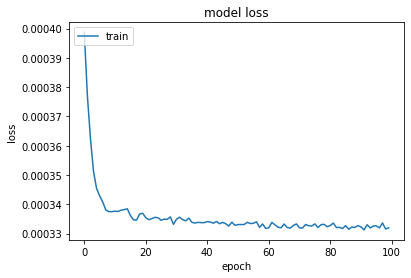

mean square error : 0.00032874219049768027
mean absolute error :  0.0039260534782355454
0.1961696165638005


In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

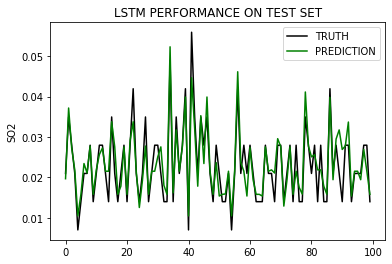

In [29]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')